In [15]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model

from blume.process import read, compute
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [16]:
T_c = 2 / np.log(1 + np.sqrt(2))
chi_range = [chi for chi in range(10, 25)]
params = ModelParameters(T_range=[T_c], tol=1e-9)
result = Results(varying_param="chi", range=chi_range)
result.get(params)

chi=10: 100%|██████████| 1/1 [00:05<00:00,  6.00s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=11: 100%|██████████| 1/1 [00:08<00:00,  8.68s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=12: 100%|██████████| 1/1 [00:06<00:00,  6.45s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=13: 100%|██████████| 1/1 [00:08<00:00,  8.61s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=14: 100%|██████████| 1/1 [00:09<00:00,  9.93s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=15: 100%|██████████| 1/1 [00:15<00:00, 15.27s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=16: 100%|██████████| 1/1 [00:18<00:00, 18.96s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=17: 100%|██████████| 1/1 [00:13<00:00, 13.27s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=18: 100%|██████████| 1/1 [00:21<00:00, 21.92s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=19: 100%|██████████| 1/1 [00:24<00:00, 24.94s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=20: 100%|██████████| 1/1 [00:28<00:00, 28.34s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=21: 100%|██████████| 1/1 [00:28<00:00, 28.60s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=22: 100%|██████████| 1/1 [00:28<00:00, 28.73s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=23: 100%|██████████| 1/1 [00:24<00:00, 24.21s/it]


Saving data in folder: '26-04 15:05'
Done 



chi=24: 100%|██████████| 1/1 [00:34<00:00, 34.03s/it]

Saving data in folder: '26-04 15:05'
Done 



## Finite $\chi$ critical exponents

In [33]:
mean_mags, mean_xis, errors = [], [], []
dir = "26-04 14:24"
for chi in range(3, 15):
    data = read(folder=dir, fn="chi", val=chi)
    mags = compute(Prop.m, data)
    corrs = compute(Prop.xi, data)

    mean_xis.append(np.mean(corrs))
    mean_mags.append(np.mean(mags))
    errors.append(np.std(mags))

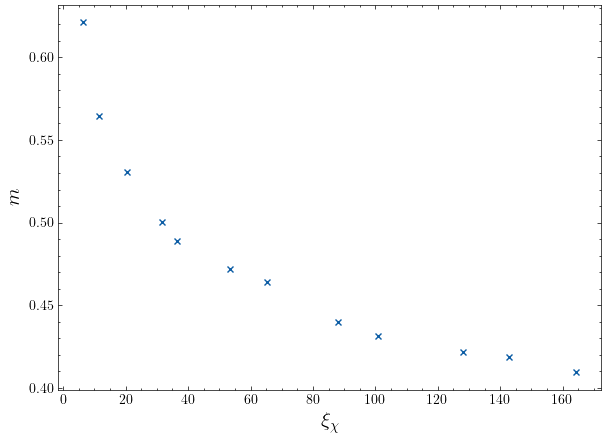

In [34]:
plt.figure(figsize=(7, 5))
plt.errorbar(mean_xis, mean_mags, yerr = errors, fmt = "x", markersize=5)
plt.xlabel(r"$\xi_{\chi}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 99
    # data points      = 12
    # variables        = 3
    chi-square         = 1.4302e-04
    reduced chi-square = 1.5891e-05
    Akaike info crit   = -130.049541
    Bayesian info crit = -128.594821
    R-squared          = 0.99692803
[[Variables]]
    a:  0.18109316 +/- 0.03899829 (21.53%) (init = 0.5)
    b:  0.15279441 +/- 0.07440563 (48.70%) (init = 0.5)
    c:  0.64966341 +/- 0.05501486 (8.47%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9966
    C(b, c) = -0.9903
    C(a, c) = -0.9758


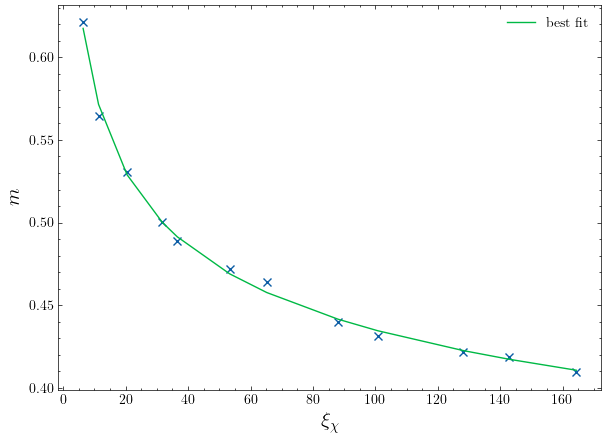

In [35]:
model = Model(lambda x, a, b, c: c*x**(-a)+b)

x, y = mean_xis, mean_mags

params = model.make_params(a=0.5, b=0.5, c=0.5)
result = model.fit(y, params, x=x)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.plot(x, y, 'x')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel(r"$\xi_{\chi}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.legend()
plt.show()

In [36]:
print(f"Obtained crit. exp.: {result.params['a'].value} +/- {result.params['a'].stderr}")
print(f"exact crit. exp.: {1/8}")

Obtained crit. exp.: 0.18109316050805802 +/- 0.03899829415272069
exact crit. exp.: 0.125


## Log transformation

In [37]:
log_xis = [np.log(xi) for xi in mean_xis]
log_mags = [np.log(m) for m in mean_mags]

/tmp/ipykernel_31753/389370505.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  log_errors = [m / err for (err, m) in zip(errors, mean_mags)]


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 12
    # variables        = 2
    chi-square         = 6.4107e-04
    reduced chi-square = 6.4107e-05
    Akaike info crit   = -114.047430
    Bayesian info crit = -113.077616
    R-squared          = 0.99654298
[[Variables]]
    a:  0.12492126 +/- 0.00232669 (1.86%) (init = 0.5)
    b: -0.25723651 +/- 0.00930979 (3.62%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9687


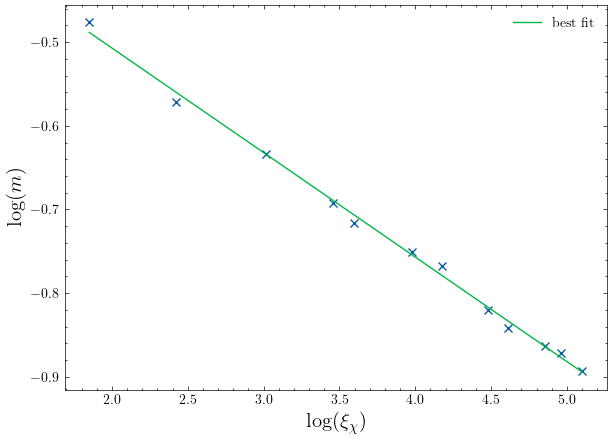

In [38]:
model = Model(lambda x, a, b: -a*x+b)

x, y = log_xis, log_mags

params = model.make_params(a=0.5, b=0.5)
result = model.fit(y, params, x=x)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.plot(x, y, 'x')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel(r"$\log(\xi_{\chi})$", fontsize=15)
plt.ylabel("$\log(m)$", fontsize=15)
plt.legend()
plt.show()

In [39]:
print(f"Obtained crit. exp.: {result.params['a'].value} +/- {result.params['a'].stderr}")
print(f"exact crit. exp.: {1/8}")

Obtained crit. exp.: 0.12492126372811509 +/- 0.0023266937640726263
exact crit. exp.: 0.125
